Malaysian MP Statistics
=============

A live notebook of working examples of using Sinar's Popit API and database of Malaysian MPs.

TODO
==

- Detailed information of Persons should probably be appended to post memberships
  this would allow us to show post (Seat) information, not just details of person.

- Refactor functions here into common library

Issues
====

- Posts should check for role, eg. Member of Parliament. Speaker is a post in Dewan Rakyat,
  but is not an MP.
  
Author
=====

Feel free to do pull requests, or contact me on issues with the data.

Khairil Yusof <khairil.yusof@sinarproject.org>








In [1]:
import requests
import json

#Dewan Rakyat MP Posts in Sinar Malaysia Popit Database
posts = []
for page in range(1,10):
    dewan_rakyat_request = requests.get('http://sinar-malaysia.popit.mysociety.org/api/v0.1/search/posts?q=organization_id:53633b5a19ee29270d8a9ecf'+'&page='+str(page))
    for post in (json.loads(dewan_rakyat_request.content)['result']):
        posts.append(post)

Now we will load up information on the MPs holding these posts

In [2]:
import datetime
from dateutil import parser


current = datetime.date(2013,5,5)

def has_end_date(member):
    
    if member.has_key('end_date') and member['end_date'] == '':
        return False
    elif not member.has_key('end_date'):
        return False
    else:
        return True
    
def current_MP(member):
    #Legislative tag term here would simply
    if (parser.parse(member['start_date'])).date() > current:
        if not has_end_date(member):
            return True
    else:
        return False
    
def person(person_id):
    #Load up information of persons from Popit database
    req = requests.get('https://sinar-malaysia.popit.mysociety.org/api/v0.1/persons/' + person_id)
    return json.loads(req.content)['result']


def age(str):
    #calculate age based on date strings stored in Popit
    born = parser.parse(str)
    today = datetime.date.today()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day)) 
    return int(age)

#Current MPs will not have end dates, and have terms after 2013-05-05

MP_ids = []
for post in posts:
    for member in post['memberships']:
        if current_MP(member):
            MP_ids.append(member['person_id'])

In [4]:
#Pull down the data of current MPs from Popit Database add calculate age if there is birthdate
MPs = []

for id in MP_ids:
    MPs.append(person(id))

In [23]:
for MP in MPs:
    if MP.has_key('birth_date'):
        if MP['birth_date']:
            #add current age in addition to the values in Popit
            MP['age'] = age(MP['birth_date'])

# Women MPs

In [6]:
WomenMPs = []
for MP in MPs:
    if MP.has_key('gender') and MP['gender'] == 'Female':
        WomenMPs.append(MP)

print "Number of Women MPs " + str(len(WomenMPs))

for MP in WomenMPs:
    print MP['name']

Number of Women MPs 24
Norah Abdul Rahman
Nurul Izzah Anwar
Teresa Kok Suh Sim
Mas Ermieyati Samsudin
Noraini Ahmad
Halimah Mohamed Sadique
Azalina Othman Said
Normala Abdul Samad
Teo Nie Ching
Rosnah Abdul Rashid Shirlin
Azizah Mohd Dun
Tsen Thau Lin
Yap Kain Ching
Julian Tan Kok Ping
Rubiah Wang
Nancy Shukri
Rohani Abdul Karim
Alice Lau Kiong Yieng
Wan Azizah Wan Ismail
Noriah Kasnon
Siti Zailah Binti Mohd Yusoff
Kasthuriraani Patto
Fuziah Binti Salleh
Zuraida Kamaruddin


# Age of MPs

In [25]:
import numpy

#list of ages
ages = []
for MP in MPs:
    if MP.has_key('age'):
        ages.append(int(MP['age']))
    
print numpy.median(ages)
print numpy.max(ages)
print numpy.min(ages)


56.0
74
32


Pandas
=====

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

If you're learning Python to work with data, it's worth getting used to this library, as it provides pretty much all you will need when working with data from importing and cleaning messy data, to exporting it, including working with very large data sets.

A lot of the earlier work, such as cleaning, getting unique values etc. could be done easily with built-in functions of pandas as a DataFrame.

In [26]:
import pandas

pandas.DataFrame(MPs)

,age,birth_date,contact_details,death_date,dissolution_date,end_date,founding_date,gender,html_url,id,...,initials,links,memberships,name,other_names,proxy_image,sources,start_date,summary,url
0,39,1975-09-12,"[{u'type': u'phone', u'id': u'558337eef3c3651a...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e48755222837c2c0596a7,...,NaN,"[{u'url': u'http://ongkianming.com', u'note': ...","[{u'contact_details': [], u'links': [], u'end_...",Ong Kian Ming,"[{u'name': u'王建民', u'id': u'558337eef3c3651a49...",https://sinar-malaysia.popit.mysociety.org/ima...,"[{u'url': u'http://ongkianming.com', u'note': ...",NaN,Dr. Ong Kian Ming was elected as a first-time ...,https://sinar-malaysia.popit.mysociety.org/api...
1,54,1960-11-01,"[{u'type': u'phone number', u'id': u'5590d64dd...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e46ee5222837c2c0592eb,...,NaN,"[{u'url': u'http://charlessantiago.org/', u'no...","[{u'contact_details': [], u'links': [], u'end_...",Charles Anthony A/L R. Santiago,"[{u'name': u'Charles Santiago', u'id': u'55918...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
2,46,1968-12-18,"[{u'type': u'email', u'id': u'55b351e0f1faa736...",NaN,NaN,NaN,NaN,Male,https://sinar-malaysia.popit.mysociety.org/per...,53635149f1eab6270da6c8f6,...,NaN,[{u'url': u'https://en.wikipedia.org/wiki/Wong...,"[{u'area_id': None, u'contact_details': [], u'...",Wong Chen,"[{u'name': u'Wong Chen X', u'id': u'55b351e0f1...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Wong Chen is a Malaysian politician and is the...,https://sinar-malaysia.popit.mysociety.org/api...
3,55,1959-10-04,"[{u'type': u'address', u'id': u'55b6017353d566...",NaN,NaN,NaN,NaN,Female,https://sinar-malaysia.popit.mysociety.org/per...,545e43f15222837c2c058b76,...,NaN,"[{u'url': u'http://dtknorah.blogspot.com/', u'...","[{u'contact_details': [], u'links': [], u'end_...",Norah Abdul Rahman,"[{u'note': u'With honorifics', u'name': u'Datu...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Datuk Hajjah Norah Abdul Rahman (born 4 Octobe...,https://sinar-malaysia.popit.mysociety.org/api...
4,37,1977-09-14,"[{u'type': u'handphone number', u'id': u'5582d...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e429d5222837c2c058829,...,NaN,[{u'url': u'https://ms-my.facebook.com/rafizir...,"[{u'contact_details': [], u'links': [], u'end_...",Mohd Rafizi Bin Ramli,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
5,64,1951-07-16,"[{u'type': u'facebook', u'id': u'5582d9c500912...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e45785222837c2c058f42,...,NaN,[{u'url': u'https://en.wikipedia.org/wiki/Che_...,"[{u'contact_details': [], u'links': [], u'end_...",Che Rosli Bin Che Mat,"[{u'name': u'Dr. Che Rosli Che Mat', u'id': u'...",https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
6,42,1973-06-19,"[{u'type': u'phone', u'id': u'5582db444a70d893...",NaN,NaN,NaN,NaN,NaN,https://sinar-malaysia.popit.mysociety.org/per...,545e43a65222837c2c058abc,...,NaN,[{u'url': u'https://en.wikipedia.org/wiki/Gobi...,"[{u'contact_details': [], u'links': [], u'end_...",Gobind Singh Deo,[],https://sinar-malaysia.popit.mysociety.org/ima...,NaN,NaN,Gobind Singh Deo (born 19 June 1973) is a prom...,https://sinar-malaysia.popit.mysociety.org/api...
7,45,1970-06-18,"[{u'type': u'facebook', u'id': u'55b5fcce9fcfa...",NaN,NaN,NaN,NaN,Male,https://sinar-malaysia.popit.mysociety.org/per...,545e44d15222837c2c058da1,...,NaN,[],"[{u'contact_details': [], u'links': [], u'end_...",Hee Loy Sian,[],https://sinar-malaysia.popit.mysociety.org/ima...,"[{u'url': u'http://www.keadilandaily.com', u'n...",NaN,NaN,https://sinar-malaysia.popit.mysociety.org/api...
8,43,1972-08-01,"[{u'type': u'twitter', u'id': u'55830e49f3c365..

In [27]:
df = pandas.DataFrame(MPs)


print df['age'].median()
print df['age'].max()
print df['age'].min()

56.0
74.0
32.0


We could have dropped duplicates from bad data: 

df.drop_duplicates('id')

Parse and set birth_date column as datetime to calculate age without parsing it manually:

df['birth_date']= pandas.to_datetime(df['birth_date'])

Best of all after cleaning up the data, we can easily export it to CSV format where it is more easily usable by normal users in spreadsheets or plotting charts.

In [28]:
MP_source = {'name':df['name'],'birth_date':df['birth_date'],'age':df['age']}

In [29]:
MP_Names = pandas.DataFrame(MP_source)

MP_Names.sort('age')

,age,birth_date,name
191,32,1982-10-17,Zairil Khir Johari
167,33,1982-05-13,Sim Chee Keong
65,34,1981-01-27,Teo Nie Ching
21,34,1980-11-19,Nurul Izzah Anwar
168,35,1979-08-09,Kasthuriraani Patto
171,37,1977-12-20,Ng Wei Aik
4,37,1977-09-14,Mohd Rafizi Bin Ramli
47,37,1977-11-27,Liew Chin Tong
43,37,1977-10-19,Chua Tee Yong
36,38,1976-11-13,Mas Ermieyati Samsudin


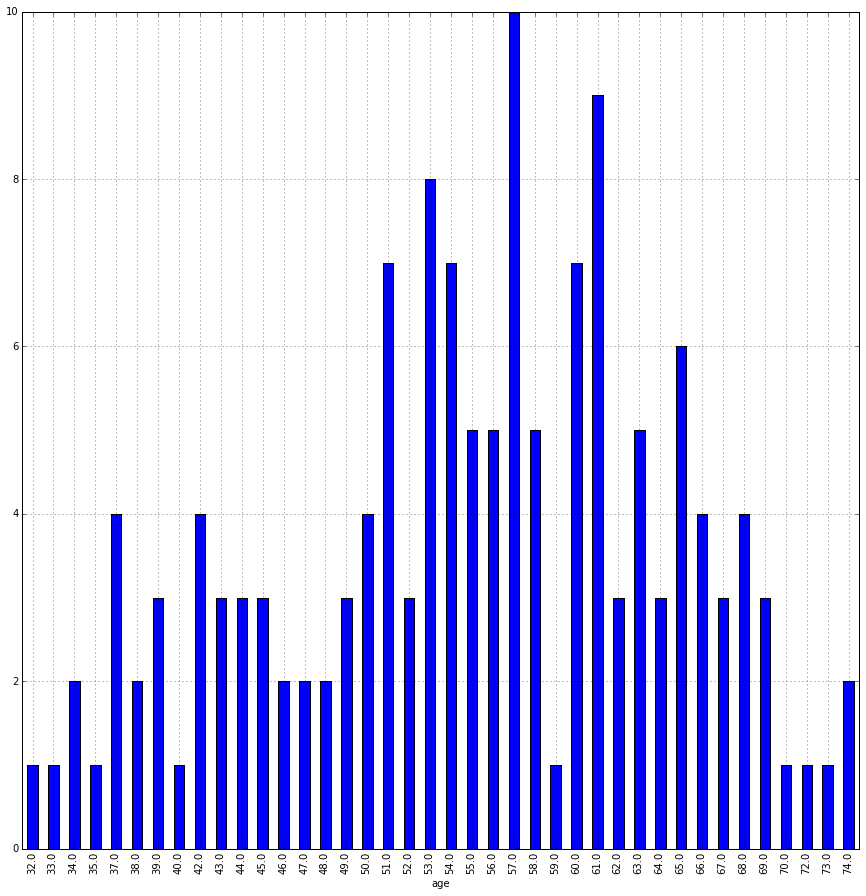

In [30]:
%matplotlib inline 
grouped = MP_Names.groupby('age')
grouped.age.count().plot(kind='bar',figsize=(15,15))

Previous example tried to massage python data structures into Pandas DataFrame which works, but isn't very pretty.

Ng Swee Meng <sweester@sinarproject.org> has contributed proper way of building up data structures for Pandas DataFrames in the following example:

In [32]:
import pandas
data = { "age": [], "birth_date": []}
data_index = { "age": [], "birth_date": []}

for entry in MPs:
    if entry.has_key('age'):
        data["age"].append(entry["age"])
        data_index["age"].append(entry["name"])
        data["birth_date"].append(entry["birth_date"])
        data_index["birth_date"].append(entry["name"])

final_data = { "age": pandas.Series(data["age"], index=data_index["age"]),
                "birth_date": pandas.Series(data["birth_date"], index=data_index["birth_date"])
             }
mp_age_df = pandas.DataFrame(final_data)
mp_age_df.sort("age")
    

,age,birth_date
Zairil Khir Johari,32,1982-10-17
Sim Chee Keong,33,1982-05-13
Teo Nie Ching,34,1981-01-27
Nurul Izzah Anwar,34,1980-11-19
Kasthuriraani Patto,35,1979-08-09
Ng Wei Aik,37,1977-12-20
Mohd Rafizi Bin Ramli,37,1977-09-14
Liew Chin Tong,37,1977-11-27
Chua Tee Yong,37,1977-10-19
Mas Ermieyati Samsudin,38,1976-11-13


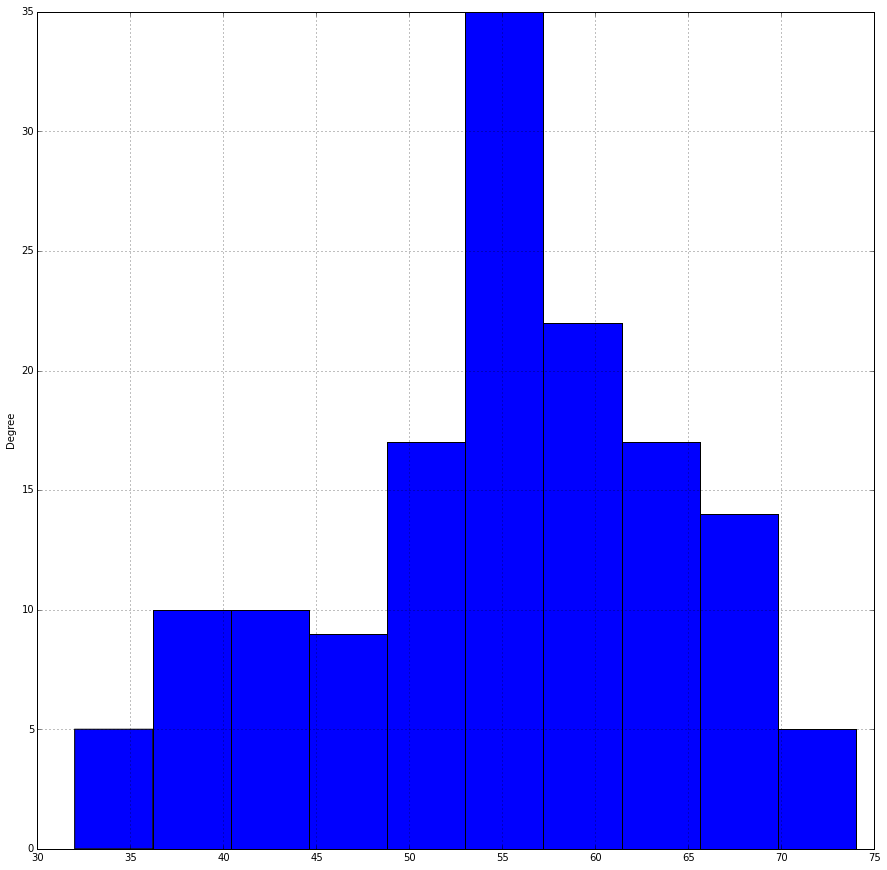

In [34]:
mp_age_df["age"].plot(kind="hist",figsize=(15,15))